# PCA

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
customers_df = pd.read_csv('/Users/marco/Documents/python_projects/churn_bcgx/data/customers_processed.csv')
complaints_df = pd.read_csv('/Users/marco/Documents/python_projects/churn_bcgx/data/complaints_processed.csv')

In [16]:
customers_aug_df = pd.merge(customers_df, complaints_df, on='CustomerId', how='inner')

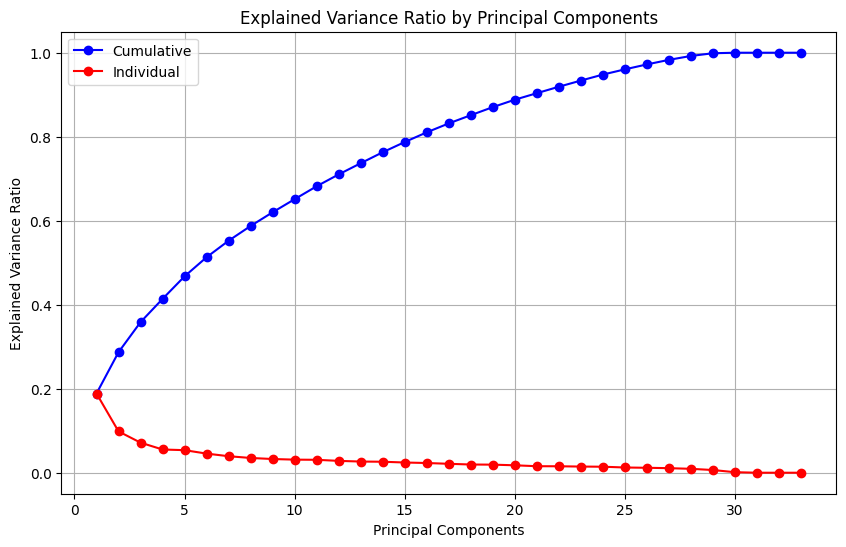

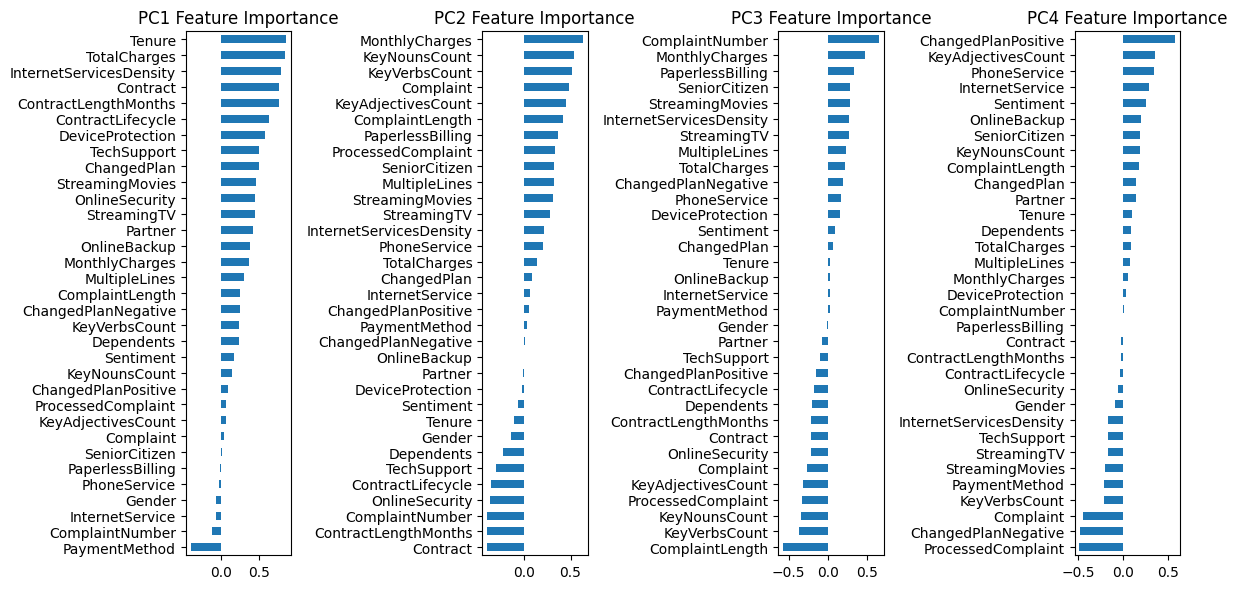


Explained variance ratio by component:
PC1: 0.189 (0.189 cumulative)
PC2: 0.098 (0.287 cumulative)
PC3: 0.072 (0.359 cumulative)
PC4: 0.055 (0.414 cumulative)
PC5: 0.054 (0.468 cumulative)
PC6: 0.046 (0.513 cumulative)
PC7: 0.039 (0.552 cumulative)
PC8: 0.035 (0.588 cumulative)
PC9: 0.033 (0.620 cumulative)
PC10: 0.031 (0.651 cumulative)
PC11: 0.031 (0.682 cumulative)
PC12: 0.028 (0.710 cumulative)
PC13: 0.027 (0.737 cumulative)
PC14: 0.026 (0.763 cumulative)
PC15: 0.024 (0.787 cumulative)
PC16: 0.023 (0.810 cumulative)
PC17: 0.021 (0.832 cumulative)
PC18: 0.020 (0.851 cumulative)
PC19: 0.019 (0.870 cumulative)
PC20: 0.018 (0.888 cumulative)
PC21: 0.016 (0.904 cumulative)
PC22: 0.015 (0.919 cumulative)
PC23: 0.015 (0.934 cumulative)
PC24: 0.014 (0.948 cumulative)
PC25: 0.012 (0.960 cumulative)
PC26: 0.012 (0.972 cumulative)
PC27: 0.011 (0.983 cumulative)
PC28: 0.009 (0.992 cumulative)
PC29: 0.006 (0.999 cumulative)
PC30: 0.001 (1.000 cumulative)
PC31: 0.000 (1.000 cumulative)
PC32: 0.

In [21]:
# 1. Data Preparation
def prepare_data_for_pca(df):
    # Create a copy to avoid modifying the original dataframe
    df_pca = df.copy()
    
    # Remove ID column and target variable
    features_df = df_pca.drop(['CustomerId', 'Churn'], axis=1)
    
    # Separate numerical and categorical columns
    numeric_cols = features_df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = features_df.select_dtypes(include=['object']).columns
    
    # Handle categorical variables using Label Encoding
    le = LabelEncoder()
    for col in categorical_cols:
        features_df[col] = le.fit_transform(features_df[col])
    
    # Scale all features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    
    return features_scaled, features_df.columns

# 2. PCA Analysis
def run_pca_analysis(X_scaled, feature_names, n_components=None):
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Fit and transform the data
    X_pca = pca.fit_transform(X_scaled)
    
    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Get component loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    return pca, X_pca, explained_variance_ratio, cumulative_variance_ratio, loadings

# 3. Visualization Functions
def plot_explained_variance(explained_variance_ratio, cumulative_variance_ratio):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), 
            cumulative_variance_ratio, 'bo-', label='Cumulative')
    plt.plot(range(1, len(explained_variance_ratio) + 1), 
            explained_variance_ratio, 'ro-', label='Individual')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_feature_importance(loadings, feature_names, n_components=4):
    plt.figure(figsize=(12, 6))
    for i in range(n_components):
        plt.subplot(1, n_components, i+1)
        importance = pd.Series(loadings[:, i], index=feature_names)
        importance.sort_values(ascending=True).plot(kind='barh')
        plt.title(f'PC{i+1} Feature Importance')
        plt.tight_layout()
    plt.show()

# Run the analysis
# 1. Prepare the data
X_scaled, feature_names = prepare_data_for_pca(customers_aug_df)

# 2. Run PCA
pca, X_pca, explained_variance_ratio, cumulative_variance_ratio, loadings = run_pca_analysis(X_scaled, feature_names)

# 3. Plot results
plot_explained_variance(explained_variance_ratio, cumulative_variance_ratio)
plot_feature_importance(loadings, feature_names)

# Print explained variance ratios
print("\nExplained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f} ({cumulative_variance_ratio[i]:.3f} cumulative)")

# Create DataFrame with feature importance for each component
feature_importance = pd.DataFrame(
    loadings,
    columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
    index=feature_names
)

print("\nTop 5 features for first two principal components:")
print("\nPC1:")
print(feature_importance['PC1'].sort_values(ascending=False).head())
print("\nPC2:")
print(feature_importance['PC2'].sort_values(ascending=False).head())

# # Optional: Create biplot of first two components colored by churn
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], 
#            c=LabelEncoder().fit_transform(customers_aug_df['Churn']),
#            cmap='viridis', alpha=0.5)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.title('PCA Biplot Colored by Churn')
# plt.colorbar(label='Churn')
# plt.show()

# Segmenting Analysis